In [41]:
#############
###paths#####
#############
import sys
import os

from importlib_metadata import distribution
pwd = os.getcwd()
modellingpath = pwd.rpartition("modelling")[0] + pwd.rpartition("modelling")[1] 
sys.path.append(modellingpath + '/lib')
#############

import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [55]:
# Specify name of circuit and variant investigated
circuit_n='circuit14'
variant='2nd'
# Specifiy number of parameter sets in parameterset file to be loaded
n_param_sets = 1000000

print(f'Circuit:{circuit_n}, Variant:{variant}')
lhs_df = pickle.load( open(modellingpath + '/3954/paper/input/lhs_parameterfiles/df_%s_variant%s_%rparametersets.pkl'%(circuit_n,variant,100000), "rb"))
# lhs_df = pickle.load( open(modellingpath + '/3954/paper/input/lhs_parameterfiles/df_circuit14_variant2nd_100000parametersets', 'rb'))

balanced_lsa_df= pickle.load( open(modellingpath + '/3954/paper/out/analytical/lsa_dataframes/all_dataframes/lsa_df_%s_variant%s_%rparametersets_balanced.pkl'%(circuit_n,variant,n_param_sets), "rb"))
print(balanced_lsa_df['system_class'].value_counts())

variant='fitted0'
n_param_sets = 2000000
fitDf = pickle.load( open(modellingpath + '/3954/paper/input/fitted_parameterfiles/df_%s_variant%s_%rparametersets.pkl'%(circuit_n,variant,n_param_sets), "rb"))

Circuit:circuit14, Variant:2nd
simple stable           1009508
hopf                      92009
complex unstable          82471
no steady state            8100
turing I oscillatory        171
turing I hopf                47
turing I                      5
Name: system_class, dtype: int64


In [56]:
instabilities = ['turing I', 'turing II', 'turing I hopf', 'turing I oscillatory', 'turing II hopf','hopf', 'turing semi-hopf']  
instabilities_df = balanced_lsa_df.loc[balanced_lsa_df['system_class'].isin(instabilities)]

turingStates = ['turing I','turing I oscillatory']  
turing_df = balanced_lsa_df.loc[balanced_lsa_df['system_class'].isin(turingStates)]
zeroSignChanges_df = balanced_lsa_df.loc[balanced_lsa_df['system_class'].isin(['Zero sign changes'])]
turing_df       

,,Dr,Va,Vb,Vc,Vd,Ve,Vf,Kda,Kub,Keb,...,nee,neb,nce,balance,ss_n,ss_list,ss_class,system_class,maxeig,complex_dispersion
3966,1,0.033591,525.870788,192.596543,389.848725,281.336797,106.70254,91.260505,1.189362,190.099619,1.632053,...,4.0,4.0,3.0,Balanced,2.0,"[4.2635, 4.0055, 3.4194, 15.0508, 1.3025, 5.5578]",stable spiral,turing I oscillatory,0.305952+0.000000j,True
4085,1,0.030486,15.688245,36.129485,980.317753,80.781394,148.068925,459.066671,2.786076,8.148615,1.120108,...,4.0,4.0,3.0,Balanced,3.0,"[1.5855, 3.8608, 37.5857, 14.1502, 1.1357, 75....",stable spiral,turing I oscillatory,0.437501+0.000000j,True
10335,0,0.04055,38.232059,18.291744,285.6555,131.493832,24.996987,16.34304,8.568025,18.359186,9.519621,...,4.0,4.0,3.0,Balanced,3.0,"[5.3791, 4.4687, 33.7194, 23.8223, 6.3258, 3.8...",stable spiral,turing I oscillatory,0.634882+0.000000j,True
15760,1,0.047993,570.432033,366.254962,975.682321,735.347987,47.357686,22.33761,1.205247,10.248279,17.991124,...,4.0,4.0,3.0,Balanced,2.0,"[4.1214, 5.7553, 6.3389, 16.2484, 38.5548, 1.4...",stable spiral,turing I oscillatory,0.368924+0.000000j,True
20766,0,0.011926,203.761037,463.940452,373.269337,33.65683,35.312855,10.68041,1.002875,57.528117,1.015736,...,4.0,4.0,3.0,Balanced,3.0,"[1.8757, 6.8003, 2.6042, 15.2649, 1.1289, 5.5267]",stable spiral,turing I oscillatory,0.018485+0.000000j,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974496,1,0.078051,604.235295,730.952934,50.031117,213.461241,449.902398,620.723609,6.741239,27.751596,1.562021,...,4.0,4.0,3.0,Balanced,3.0,"[2.677, 42.0675, 1.1389, 127.7821, 1.3548, 369...",stable spiral,turing I oscillatory,0.223218+0.000000j,True
983665,0,0.012135,178.351788,75.804113,15.884564,147.686856,11.15878,22.905494,9.363008,56.658395,9.247058,...,4.0,4.0,3.0,Balanced,1.0,"[15.3089, 7.1826, 2.2744, 31.7023, 10.4132, 5....",stable spiral,turing I oscillatory,0.278265+0.000000j,True
985253,0,0.016053,78.216495,14.652087,876.68531,508.937765,214.45374,13.654328,41.315232,6.359916,32.752138,...,4.0,4.0,3.0,Balanced,3.0,"[2.6585, 4.8618, 19.5887, 280.7076, 19.2137, 8...",stable spiral,turing I oscillatory,0.004971+0.000000j,True
992274,1,0.061082,736.600537,17.744173,47.392415,47.651823,86.467244,161.903381,4.866655,198.513256,4.21932,...,4.0,4.0,3.0,Balanced,3.0,"[30.3248, 2.9116, 2.8867, 23.9005, 2.9221, 78....",stable spiral,turing I oscillatory,0.310925+0.000000j,True


In [57]:
pfitDict = {'Vc': 99.99999998437673,
'Vd': 8.845204237579598,
'Ve': 99.99999902098732,
'Vf': 8.394996554940189,
'Kvd': 0.9400832873750722,
'Kda': 4.142114110177617,
'Kce': 4.342277899710668,
'Kfe': 0.4319218458202641}


paramList = pfitDict.keys()

#copy pandas df to new df
# fitDf = lhs_df.copy()
# for param in paramList:
#     fitDf[param] = pfitDict[param]
# fitDf

/var/folders/bt/1cqt3cks1sl9cz4dfwlyxhpm0000gn/T/ipykernel_20518/1595444521.py:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(generalDf.iloc[:crop,count].values,bins=newBins, kde=False,color = 'peachpuff', ax = axs[count], label='General')
/var/folders/bt/1cqt3cks1sl9cz4dfwlyxhpm0000gn/T/ipykernel_20518/1595444521.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https

VA 255.28199171473796
VB 265.9603340267044
VC 316.26639407241845
VD 286.3652261987219
VE 291.7664894107091
VF 260.3725424788569
Kda 51.24443593201315
Kab 33.08526590658336
Keb 40.83524406684529
Kbd 37.21114844220765
Kfe 43.649850336649564
Kee 0.009999999999999875
Kce 67.89835562616247
muLVA 3.78553409789079
muASV 1.0
nbd 2.0
nab 1.0
nda 1.0
nfe 4.0
nee 4.0
neb 4.0


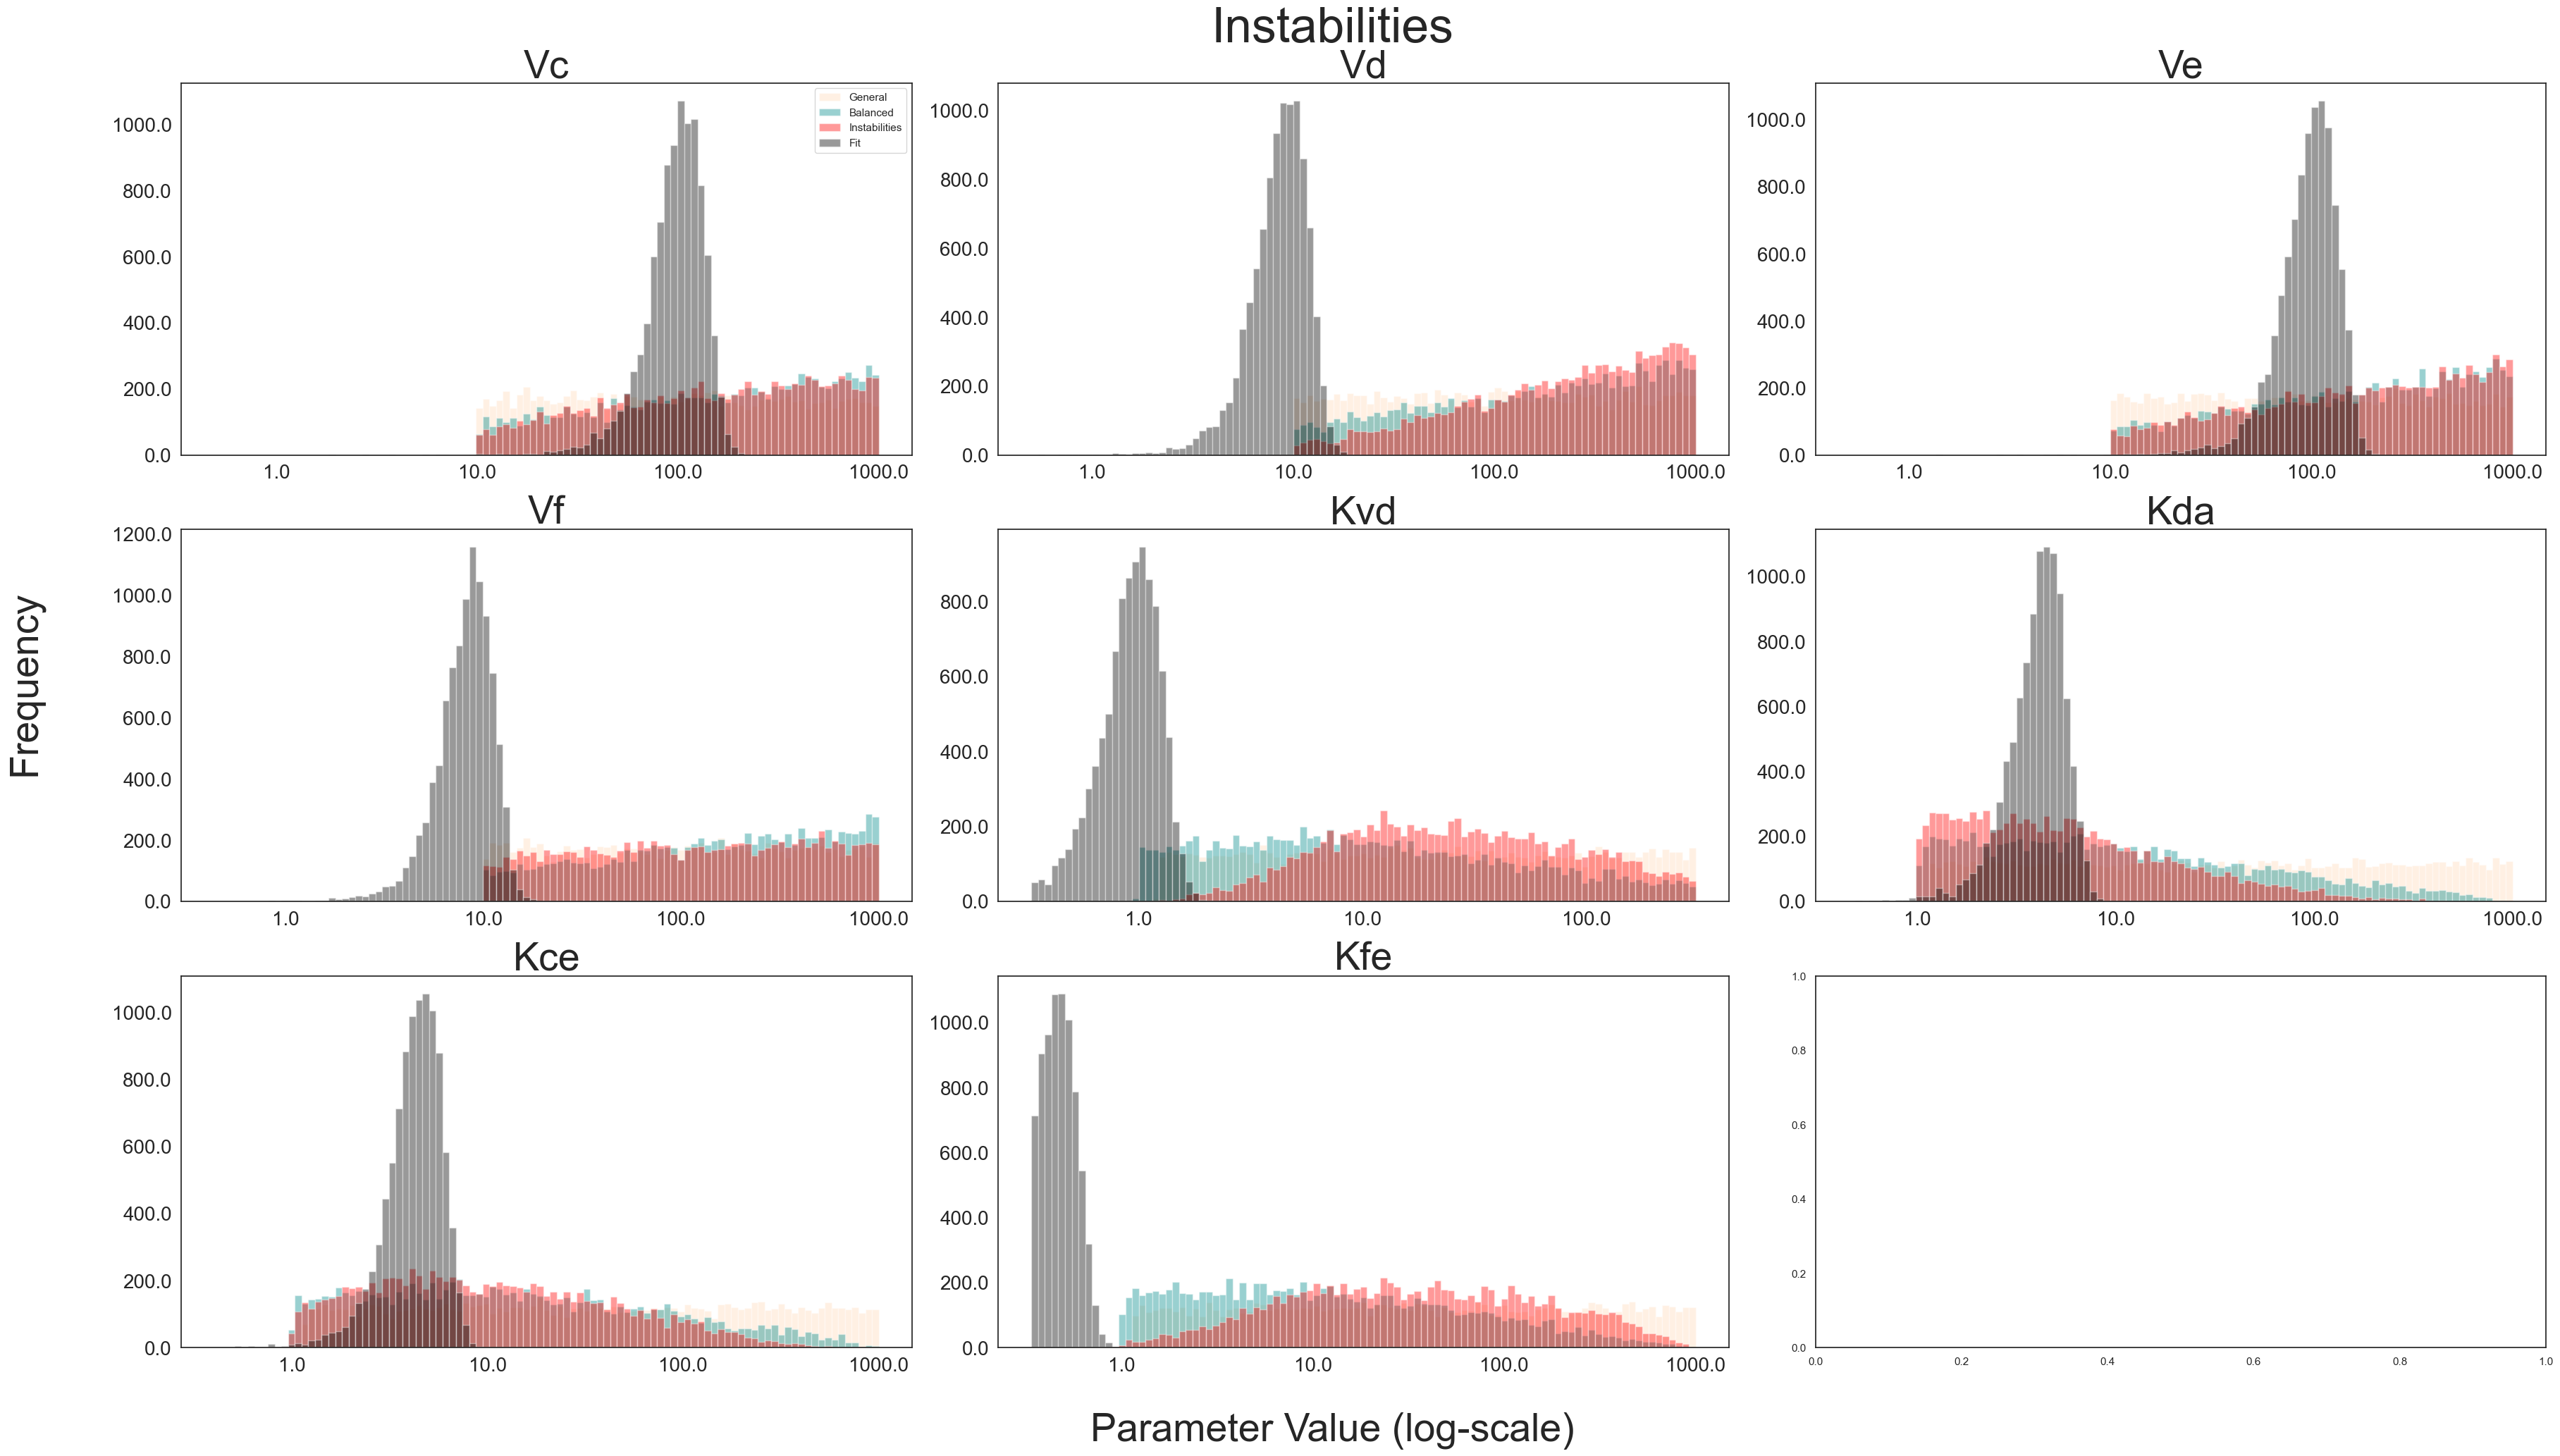

/var/folders/bt/1cqt3cks1sl9cz4dfwlyxhpm0000gn/T/ipykernel_20518/1595444521.py:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(generalDf.iloc[:crop,count].values,bins=newBins, kde=False,color = 'peachpuff', ax = axs[count], label='General')
/var/folders/bt/1cqt3cks1sl9cz4dfwlyxhpm0000gn/T/ipykernel_20518/1595444521.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https

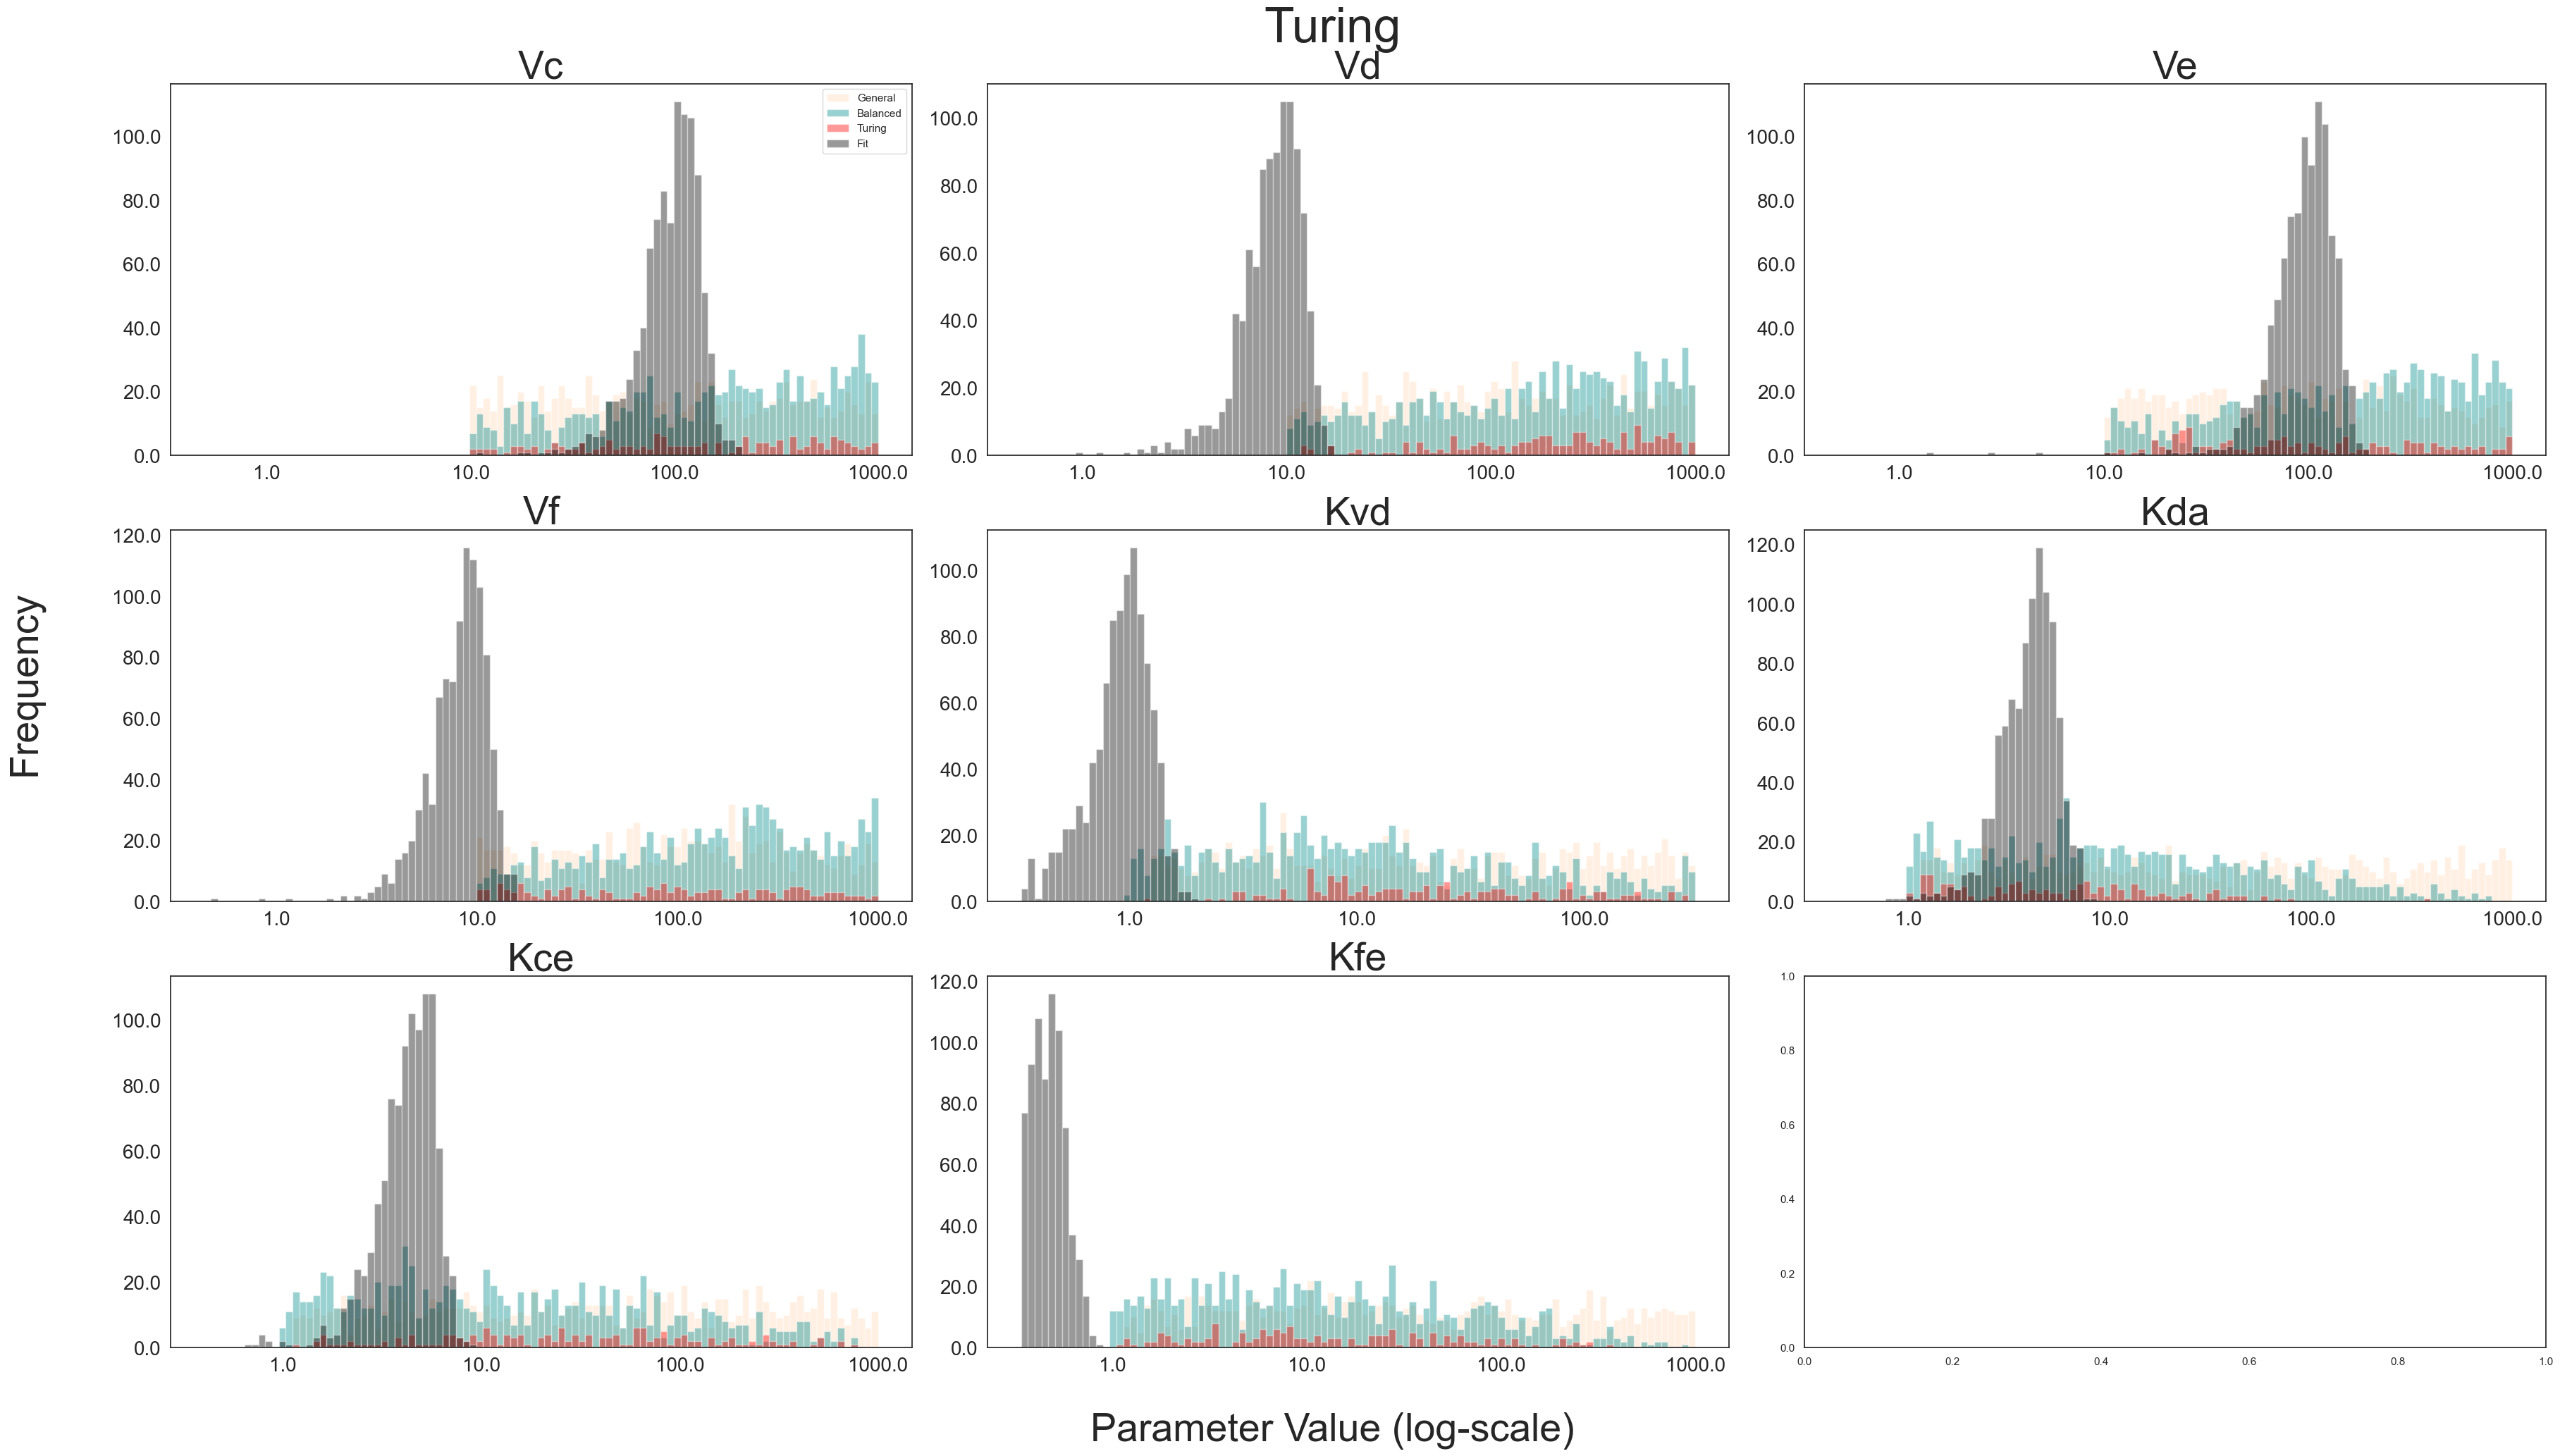

In [88]:
from scipy import stats
def paramsHistogram(generalDf,balancedDf,specificDf,fitDf,title,crop=2000):
    sns.set(style="white", palette="muted", color_codes=False)

    fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(35,20))
    axs = axs.flatten()
    palette = sns.diverging_palette(10, 220, n=2)
    # paramList=['Dr','VA','VB','VC','VD','VE','VF', 'Kda','Kab', 'Keb', 'Kbd', 'Kfe', 'Kee', 'Kce', 'muLVA']
    df_concat = pd.concat([generalDf,balancedDf,specificDf,fitDf])
    # df_concat[(np.abs(stats.zscore(df_concat)) < 3).all(axis=1)]
    # df_concat[np.abs(df_concat.Data-df_concat.Data.mean()) <= (3*df_concat.Data.std())]

    for count, parameter in enumerate(paramList):
    # for count, parameter in enumerate(lsa_df.columns[:24]):
        q = df_concat[parameter].quantile(0.3)
        df_concat[df_concat[parameter] < q]
        LogMin, LogMax = np.log10(df_concat.iloc[:,count].min()),np.log10(df_concat.iloc[:,count].max())
        newBins = np.logspace(LogMin/10, LogMax,100)
        sns.distplot(generalDf.iloc[:crop,count].values,bins=newBins, kde=False,color = 'peachpuff', ax = axs[count], label='General')
        sns.distplot(balancedDf.iloc[:crop,count].values,bins=newBins, kde=False, color = 'darkcyan', ax = axs[count], label='Balanced')
        sns.distplot(specificDf.iloc[:crop,count].values,bins=newBins, kde=False, color = 'red', ax = axs[count], label=title)
        sns.distplot(fitDf.iloc[:crop,count].values,bins=newBins, kde=False, color = 'black', ax = axs[count], label='Fit')

        axs[count].set_xscale('log')
        axs[count].set_yticklabels(axs[count].get_yticks(), size = 20)
        axs[count].set_xticklabels(axs[count].get_xticks(), size = 20)

        axs[count].set_title(str(parameter),fontsize=40)
    #     axs[count].set_xlim(0)
        axs[0].legend()
    # fig.legend()
    fig.suptitle(title, fontsize=50)
    fig.tight_layout()
    fig.text(0.5,-0.03, "Parameter Value (log-scale)", ha="center", va="center",  fontsize=40)
    fig.text(-0.03,0.5, "Frequency", ha="center", va="center", rotation=90 ,fontsize=40)
    plt.show()


lhs_df = lhs_df[paramList]
balanced_lsa_df = balanced_lsa_df[paramList]
instabilities_df = instabilities_df[paramList]
turing_df = turing_df[paramList]
fitDf = fitDf[paramList]

paramsHistogram(lhs_df,balanced_lsa_df,instabilities_df,fitDf, 'Instabilities',crop=10000)
# paramsHistogram(lhs_df,balanced_lsa_df,instabilities_df,fitDf, 'Instabilities',crop=100)
# paramsHistogram(lsa_df,turing_df, 'Turing',crop=200)
paramsHistogram(lhs_df,balanced_lsa_df,turing_df,fitDf, 'Turing',crop=1000)
# paramsHistogram(lsa_df,zeroSignChanges_df, 'Diffusion independent stability',crop=2000)



In [ ]:
def paramsHistogram(generalDf,specificDf,title,crop=2000):
    sns.set(style="white", palette="muted", color_codes=False)

    fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(35,20))
    axs = axs.flatten()
    palette = sns.diverging_palette(10, 220, n=2)
    # paramList=['Dr','VA','VB','VC','VD','VE','VF', 'Kda','Kab', 'Keb', 'Kbd', 'Kfe', 'Kee', 'Kce', 'muLVA']
    for count, parameter in enumerate(paramList):
    # for count, parameter in enumerate(lsa_df.columns[:24]):
        LogMin, LogMax = np.log10(generalDf.iloc[:,count].min()),np.log10(generalDf.iloc[:,count].max())
        newBins = np.logspace(LogMin, LogMax,100)
        sns.distplot(generalDf.iloc[:crop,count].values,bins=newBins, kde=False,color = 'darkcyan', ax = axs[count])
        sns.distplot(specificDf.iloc[:crop,count].values,bins=newBins, kde=False, color = 'red', ax = axs[count])


        axs[count].set_xscale('log')
        axs[count].set_yticklabels(axs[count].get_yticks(), size = 20)
        axs[count].set_xticklabels(axs[count].get_xticks(), size = 20)

        axs[count].set_title(str(parameter),fontsize=40)
    #     axs[count].set_xlim(0)
    fig.suptitle(title, fontsize=50)
    fig.tight_layout()
    fig.text(0.5,-0.03, "Parameter Value (log-scale)", ha="center", va="center",  fontsize=40)
    fig.text(-0.03,0.5, "Frequency", ha="center", va="center", rotation=90 ,fontsize=40)
    plt.show()


lsa_df = lsa_df[paramList]
instabilities_df = instabilities_df[paramList]
turing_df = turing_df[paramList]

paramsHistogram(lsa_df,instabilities_df, 'Instabilities',crop=10000)
# paramsHistogram(lsa_df,turing_df, 'Turing',crop=200)
paramsHistogram(lsa_df,turing_df, 'Turing',crop=1000)
# paramsHistogram(lsa_df,zeroSignChanges_df, 'Diffusion independent stability',crop=2000)

